# Distribution of variables according to vital status

In this notebook, I am going to create plots to see the distribution of each of the variables according to vital status. 

Firstly, I am going to install the dependencies that are needed and then I am going to open the pickle file that I had saved in the previous notebook, which contains all the tables ("SIM_AV_PATIENT", "SIM_AV_TUMOUR", "SIM_SACT_PATIENT", "SIM_SACT_TUMOUR" and "SIM_SACT_REGIMEN").

In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import matplotlib.ticker as mtick
sns.set(rc={'figure.figsize':(7,5)})

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
7,10001901,M,NaN,A,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,2.0,0.0,2.0,2.0,62.0,0,1,0,0,0,0,0,0,1,0,0,0.0,1.0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,2.0,63.0,0,1,0,0,0,0,0,0,0,0,0,0.0,3.0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(33690, 60)

In [5]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
BEH_MALIG_METAS                 0
BEH_MALIG_UNCERT                0
T                               0
N                               0
M                               0
STAGE                           0
GRADE_2                         0
AGE_MEDIAN                      0
L0801                           0
L1001                           0
L1701         

In [6]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NEWVITALSTATUS               category
NUMBER_TUMOURS                  int64
C180                            int64
C181                            int64
C182                            int64
C183                            int64
C184                            int64
C185                            int64
C186                            int64
C187                            int64
C188                            int64
BEH_BENIGN                      int64
BEH_MALIG                       int64
BEH_MICINV                      int64
BEH_INSITU                      int64
BEH_UNCERT                      int64
BEH_MALIG_METAS                 int64
BEH_MALIG_UNCERT                int64
T                             float64
N                             float64
M                             float64
STAGE                         float64
GRADE_2                       float64
AGE_MEDIAN  

I am also going to reclassify the variable "NEWVITALSTATUS". If the patient is dead the value will be 1, and if the patient is alive the value will be 0.

In [7]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    25237
1     8453
Name: DEAD, dtype: int64

In [8]:
df = df.drop(['NEWVITALSTATUS'], axis=1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,T,N,M,STAGE,GRADE_2,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG,DEPR,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,79.0,0,1,0,0,0,0,0,0,0,0,0,2.0,4.0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,0.0,0.0,3.0,2.0,86.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0.0,0.0,3.0,2.0,77.0,1,0,0,0,0,0,0,0,0,1,0,0.0,3.0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,10001901,M,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,2.0,0.0,2.0,2.0,62.0,0,1,0,0,0,0,0,0,1,0,0,0.0,1.0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,2.0,63.0,0,1,0,0,0,0,0,0,0,0,0,0.0,3.0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


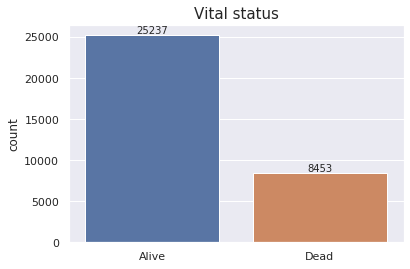

In [9]:
ax = sns.countplot(data=df, x='DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, height, ha='center')

In [10]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print(f'Percentage of patients classified as alive: {percentage_alive:.1f}%')
print(f'Percentage of patients classified as dead: {percentage_dead:.1f}%')

Percentage of patients classified as alive: 74.9%
Percentage of patients classified as dead: 25.1%


In [11]:
df.groupby('DEAD')['SEX'].value_counts()

DEAD  SEX
0     M      12945
      F      12292
1     M       4324
      F       4129
Name: SEX, dtype: int64

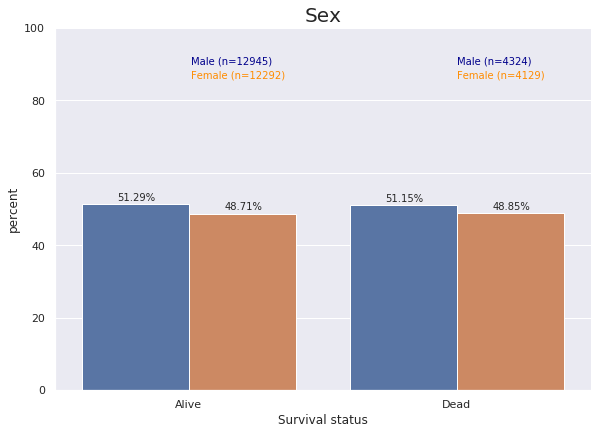

In [12]:
x, y = 'DEAD', 'SEX'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Sex', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(9,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 90, 'Male (n=12945)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 86, 'Female (n=12292)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 90, 'Male (n=4324)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 86, 'Female (n=4129)', horizontalalignment='left', size='medium', color='darkorange');

In [13]:
df.groupby('DEAD')['ETHNICITY'].value_counts()

DEAD  ETHNICITY                    
0     White British                    21596
      Other white background             714
      White Irish                        268
      Other ethnic group                 203
      Asian Indian                       197
      Black Caribbean                    185
      Asian Pakistani                    105
      Other Asian background             104
      Black African                      101
      Chinese                             77
      Other black background              56
      Asian Bangladeshi                   31
      Other mixed background              27
      White and black Caribbean           14
      Mixed white and Asian               13
      Mixed white and black African        5
      White                                5
      Other                                2
1     White British                     7331
      Other white background             247
      Other ethnic group                  86
      White Irish  

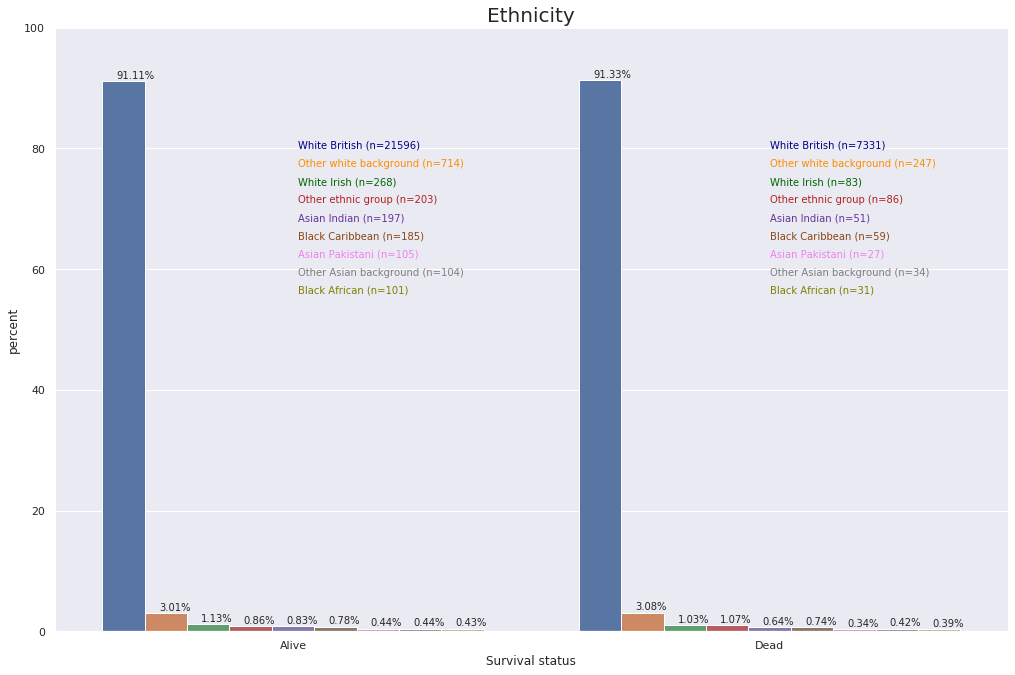

In [14]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True).iloc[[0,1,2,3,4,5,6,7,8,18,19,20,21,22,23,24,25,26]]
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Ethnicity', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(16,10)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, 'White British (n=21596)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 77, 'Other white background (n=714)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 74, 'White Irish (n=268)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.01, 71, 'Other ethnic group (n=203)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.01, 68, 'Asian Indian (n=197)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.01, 65, 'Black Caribbean (n=185)', horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(0.01, 62, 'Asian Pakistani (n=105)', horizontalalignment='left', size='medium', color='violet')
ax.ax.text(0.01, 59, 'Other Asian background (n=104)', horizontalalignment='left', size='medium', color='grey')
ax.ax.text(0.01, 56, 'Black African (n=101)', horizontalalignment='left', size='medium', color='olive')
ax.ax.text(1, 80, 'White British (n=7331)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 77, 'Other white background (n=247)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 74, 'White Irish (n=83)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 71, 'Other ethnic group (n=86)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1, 68, 'Asian Indian (n=51)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(1, 65, 'Black Caribbean (n=59)', horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(1, 62, 'Asian Pakistani (n=27)', horizontalalignment='left', size='medium', color='violet')
ax.ax.text(1, 59, 'Other Asian background (n=34)', horizontalalignment='left', size='medium', color='grey')
ax.ax.text(1, 56, 'Black African (n=31)', horizontalalignment='left', size='medium', color='olive');

Note: only the most common ethnicities are represented in the plot above.

In [15]:
df.groupby('DEAD')['NUMBER_TUMOURS'].value_counts()

DEAD  NUMBER_TUMOURS
0     1                 24628
      2                   594
      3                    15
1     1                  8416
      2                    37
Name: NUMBER_TUMOURS, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


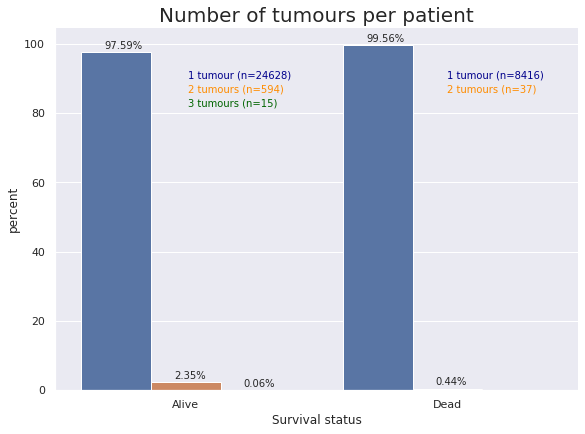

In [16]:
x, y = 'DEAD', 'NUMBER_TUMOURS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Number of tumours per patient', fontsize=20)
plt.gcf().set_size_inches(9,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 90, '1 tumour (n=24628)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 86, '2 tumours (n=594)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 82, '3 tumours (n=15)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 90, '1 tumour (n=8416)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 86, '2 tumours (n=37)', horizontalalignment='left', size='medium', color='darkorange');

In [17]:
df.groupby('DEAD')['C180'].value_counts()

DEAD  C180
0     0       20084
      1        5153
1     0        6573
      1        1880
Name: C180, dtype: int64

In [18]:
df.groupby('DEAD')['C181'].value_counts()

DEAD  C181
0     0       24370
      1         867
1     0        8245
      1         208
Name: C181, dtype: int64

In [19]:
df.groupby('DEAD')['C182'].value_counts()

DEAD  C182
0     0       21735
      1        3502
1     0        7274
      1        1179
Name: C182, dtype: int64

In [20]:
df.groupby('DEAD')['C183'].value_counts()

DEAD  C183
0     0       24070
      1        1167
1     0        8003
      1         450
Name: C183, dtype: int64

In [21]:
df.groupby('DEAD')['C184'].value_counts()

DEAD  C184
0     0       23016
      1        2221
1     0        7730
      1         723
Name: C184, dtype: int64

In [22]:
df.groupby('DEAD')['C185'].value_counts()

DEAD  C185
0     0       24328
      1         909
1     0        8164
      1         289
Name: C185, dtype: int64

In [23]:
df.groupby('DEAD')['C186'].value_counts()

DEAD  C186
0     0       24109
      1        1128
1     0        8097
      1         356
Name: C186, dtype: int64

In [24]:
df.groupby('DEAD')['C187'].value_counts()

DEAD  C187
0     0       17182
      1        8055
1     0        6047
      1        2406
Name: C187, dtype: int64

In [25]:
df.groupby('DEAD')['C188'].value_counts()

DEAD  C188
0     0       25105
      1         132
1     0        8407
      1          46
Name: C188, dtype: int64

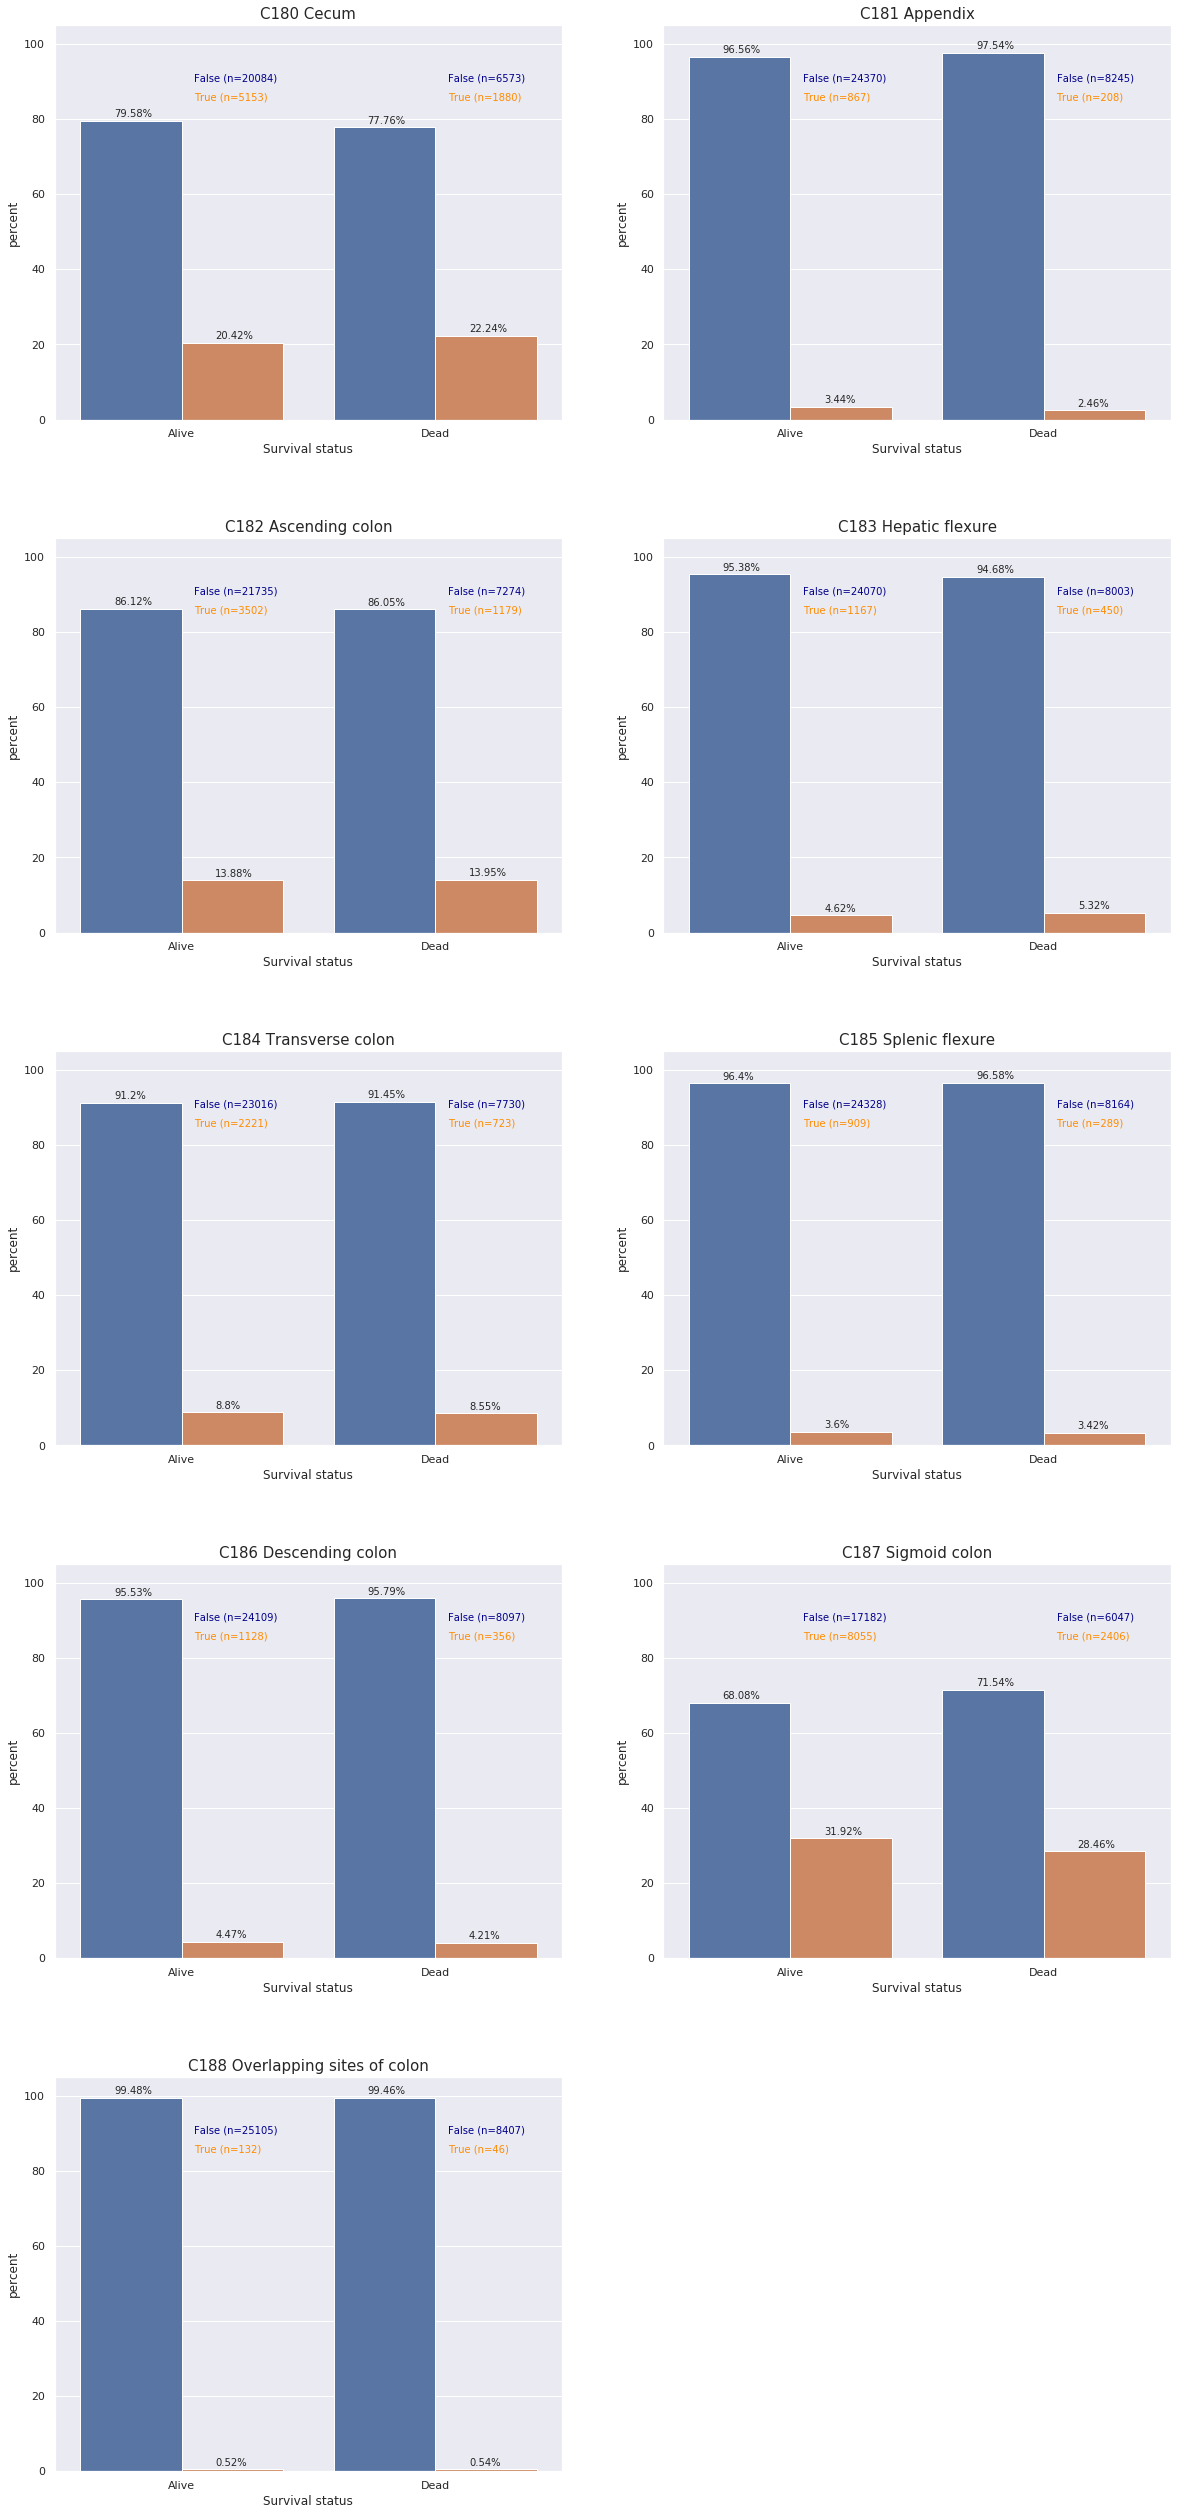

In [26]:
f, axes = plt.subplots(5, 2, figsize=(20, 45))
plt.subplots_adjust(hspace=0.3)

#Figure 1
x, y = 'DEAD', 'C180'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('C180 Cecum', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 90, 'False (n=20084)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=5153)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=6573)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'True (n=1880)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'C181'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('C181 Appendix', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 90, 'False (n=24370)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 85, 'True (n=867)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 90, 'False (n=8245)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 85, 'True (n=208)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'C182'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('C182 Ascending colon', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 90, 'False (n=21735)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=3502)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=7274)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'True (n=1179)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'C183'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 1]))

axes[1,1].set_title('C183 Hepatic flexure', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 90, 'False (n=24070)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 85, 'True (n=1167)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 90, 'False (n=8003)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 85, 'True (n=450)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'C184'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 0]))

axes[2,0].set_title('C184 Transverse colon', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 90, 'False (n=23016)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 85, 'True (n=2221)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 90, 'False (n=7730)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 85, 'True (n=723)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'C185'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 1]))

axes[2,1].set_title('C185 Splenic flexure', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 90, 'False (n=24328)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 85, 'True (n=909)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 90, 'False (n=8164)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 85, 'True (n=289)', horizontalalignment='left', size='medium', color='darkorange')    
    
#Figure 7
x, y = 'DEAD', 'C186'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 0]))

axes[3,0].set_title('C186 Descending colon', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 90, 'False (n=24109)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 85, 'True (n=1128)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 90, 'False (n=8097)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 85, 'True (n=356)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 8
x, y = 'DEAD', 'C187'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 1]))

axes[3,1].set_title('C187 Sigmoid colon', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 90, 'False (n=17182)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 85, 'True (n=8055)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 90, 'False (n=6047)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 85, 'True (n=2406)', horizontalalignment='left', size='medium', color='darkorange')    

#Figure 9
x, y = 'DEAD', 'C188'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[4, 0]))

axes[4,0].set_title('C188 Overlapping sites of colon', fontsize=15)
axes[4,0].set(xticklabels=['Alive','Dead'])
axes[4,0].set(xlabel='Survival status')
axes[4,0].set_ylim(0,105)
axes[4,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[4,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[4,0].text(txt_x,txt_y,txt)
    
axes[4,0].text(0.05, 90, 'False (n=25105)', horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(0.05, 85, 'True (n=132)', horizontalalignment='left', size='medium', color='darkorange')
axes[4,0].text(1.05, 90, 'False (n=8407)', horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(1.05, 85, 'True (n=46)', horizontalalignment='left', size='medium', color='darkorange')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
f.delaxes(ax = axes[4,1])
plt.show()

In [27]:
df.groupby('DEAD')['BEH_BENIGN'].value_counts()

DEAD  BEH_BENIGN
0     0             25233
      1                 4
1     0              8453
Name: BEH_BENIGN, dtype: int64

In [28]:
df.groupby('DEAD')['BEH_MALIG'].value_counts()

DEAD  BEH_MALIG
0     1            25176
      0               61
1     1             8448
      0                5
Name: BEH_MALIG, dtype: int64

In [29]:
df.groupby('DEAD')['BEH_MICINV'].value_counts()

DEAD  BEH_MICINV
0     0             25233
      1                 4
1     0              8453
Name: BEH_MICINV, dtype: int64

In [30]:
df.groupby('DEAD')['BEH_INSITU'].value_counts()

DEAD  BEH_INSITU
0     0             25195
      1                42
1     0              8452
      1                 1
Name: BEH_INSITU, dtype: int64

In [31]:
df.groupby('DEAD')['BEH_UNCERT'].value_counts()

DEAD  BEH_UNCERT
0     0             25227
      1                10
1     0              8450
      1                 3
Name: BEH_UNCERT, dtype: int64

In [32]:
df.groupby('DEAD')['BEH_MALIG_METAS'].value_counts()

DEAD  BEH_MALIG_METAS
0     0                  25233
      1                      4
1     0                   8453
Name: BEH_MALIG_METAS, dtype: int64

In [33]:
df.groupby('DEAD')['BEH_MALIG_UNCERT'].value_counts()

DEAD  BEH_MALIG_UNCERT
0     0                   25236
      1                       1
1     0                    8452
      1                       1
Name: BEH_MALIG_UNCERT, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


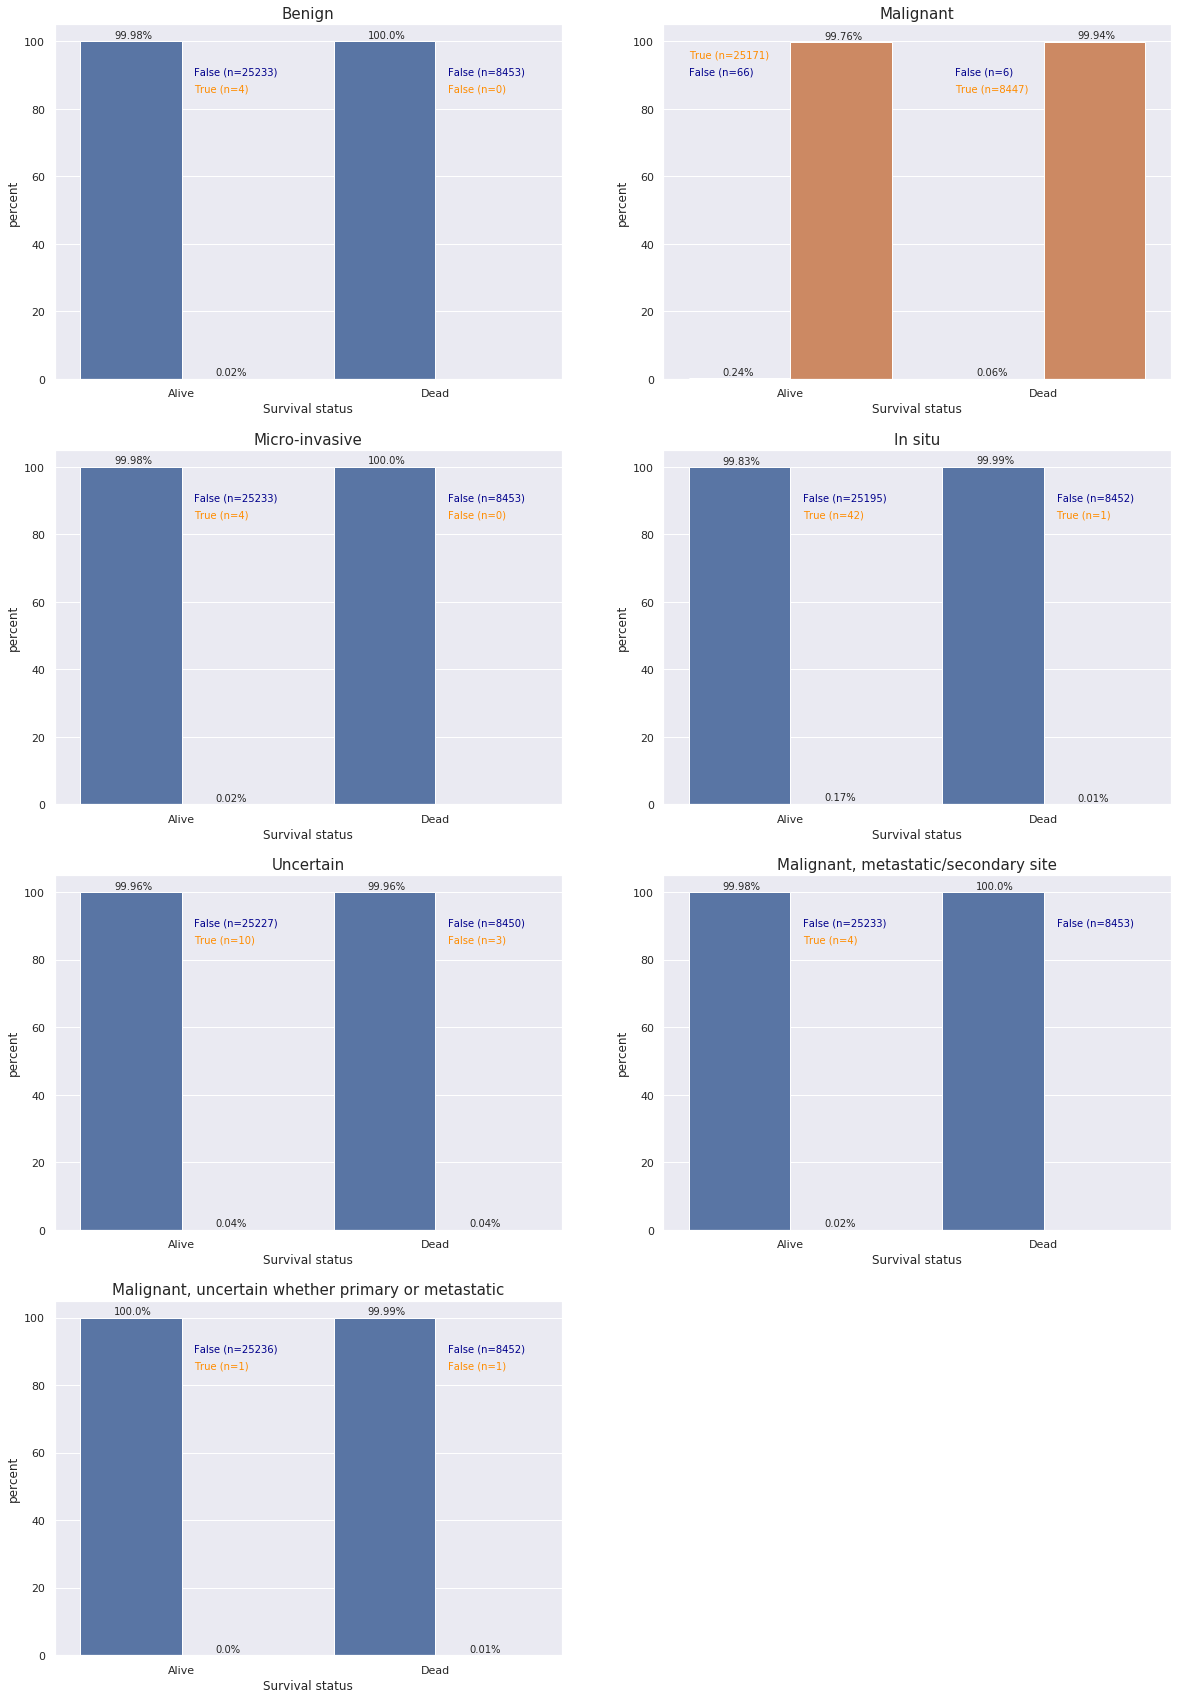

In [34]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))

#Figure 1
x, y = 'DEAD', 'BEH_BENIGN'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('Benign', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)

axes[0,0].text(0.05, 90, 'False (n=25233)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=4)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=8453)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'False (n=0)', horizontalalignment='left', size='medium', color='darkorange')  


#Figure 2
x, y = 'DEAD', 'BEH_MALIG'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('Malignant', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)
    
axes[0,1].text(-0.4, 90, 'False (n=66)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(-0.4, 95, 'True (n=25171)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(0.65, 90, 'False (n=6)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.65, 85, 'True (n=8447)', horizontalalignment='left', size='medium', color='darkorange')    

#Figure 3
x, y = 'DEAD', 'BEH_MICINV'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('Micro-invasive', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)
    
axes[1,0].text(0.05, 90, 'False (n=25233)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=4)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=8453)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'False (n=0)', horizontalalignment='left', size='medium', color='darkorange')  


#Figure 4
x, y = 'DEAD', 'BEH_INSITU'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 1]))

axes[1,1].set_title('In situ', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 90, 'False (n=25195)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 85, 'True (n=42)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 90, 'False (n=8452)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 85, 'True (n=1)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'BEH_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 0]))

axes[2,0].set_title('Uncertain', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 90, 'False (n=25227)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 85, 'True (n=10)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 90, 'False (n=8450)', horizontalalignment='left', size='medium', color='darkblue')   
axes[2,0].text(1.05, 85, 'False (n=3)', horizontalalignment='left', size='medium', color='darkorange')  


#Figure 6
x, y = 'DEAD', 'BEH_MALIG_METAS'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 1]))

axes[2,1].set_title('Malignant, metastatic/secondary site', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 90, 'False (n=25233)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 85, 'True (n=4)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 90, 'False (n=8453)', horizontalalignment='left', size='medium', color='darkblue')


#Figure 7
x, y = 'DEAD', 'BEH_MALIG_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 0]))

axes[3,0].set_title('Malignant, uncertain whether primary or metastatic', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)

axes[3,0].text(0.05, 90, 'False (n=25236)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 85, 'True (n=1)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 90, 'False (n=8452)', horizontalalignment='left', size='medium', color='darkblue')   
axes[3,0].text(1.05, 85, 'False (n=1)', horizontalalignment='left', size='medium', color='darkorange') 
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [35]:
df.groupby('DEAD')['T'].value_counts()

DEAD  T  
0     3.0    13687
      4.0     5728
      2.0     3089
      1.0     2727
      0.0        6
1     3.0     5503
      4.0     2266
      2.0      411
      1.0      271
      0.0        2
Name: T, dtype: int64

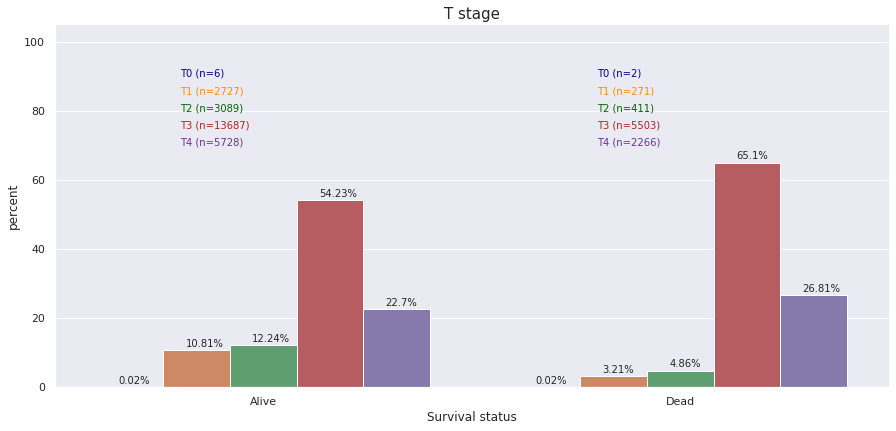

In [36]:
x, y = 'DEAD', 'T'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('T stage', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(14,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(-0.2, 90, 'T0 (n=6)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(-0.2, 85, 'T1 (n=2727)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(-0.2, 80, 'T2 (n=3089)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(-0.2, 75, 'T3 (n=13687)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(-0.2, 70, 'T4 (n=5728)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.8, 90, 'T0 (n=2)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.8, 85, 'T1 (n=271)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.8, 80, 'T2 (n=411)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.8, 75, 'T3 (n=5503)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.8, 70, 'T4 (n=2266)', horizontalalignment='left', size='medium', color='rebeccapurple');

In [37]:
df.groupby('DEAD')['N'].value_counts()

DEAD  N  
0     0.0    17192
      1.0     5031
      2.0     2983
      3.0       31
1     0.0     4839
      1.0     2051
      2.0     1548
      3.0       15
Name: N, dtype: int64

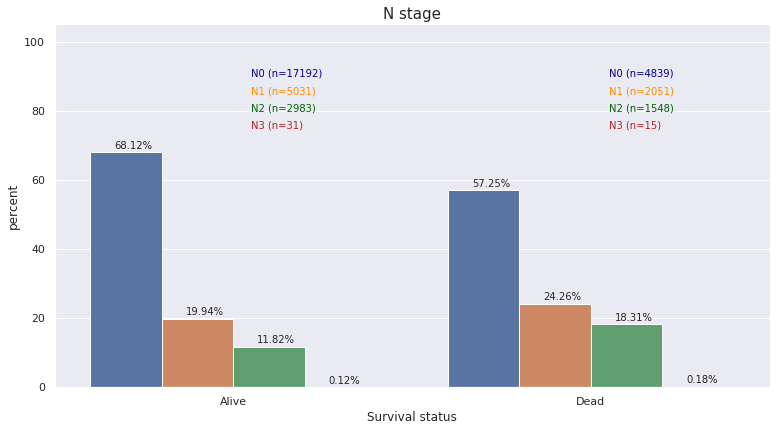

In [38]:
x, y = 'DEAD', 'N'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('N stage', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(12,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 90, 'N0 (n=17192)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 85, 'N1 (n=5031)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.05, 80, 'N2 (n=2983)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.05, 75, 'N3 (n=31)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1.05, 90, 'N0 (n=4839)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 85, 'N1 (n=2051)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, 'N2 (n=1548)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1.05, 75, 'N3 (n=15)', horizontalalignment='left', size='medium', color='firebrick');

In [39]:
df.groupby('DEAD')['M'].value_counts()

DEAD  M  
0     0.0    22669
      1.0     2568
1     0.0     4617
      1.0     3836
Name: M, dtype: int64

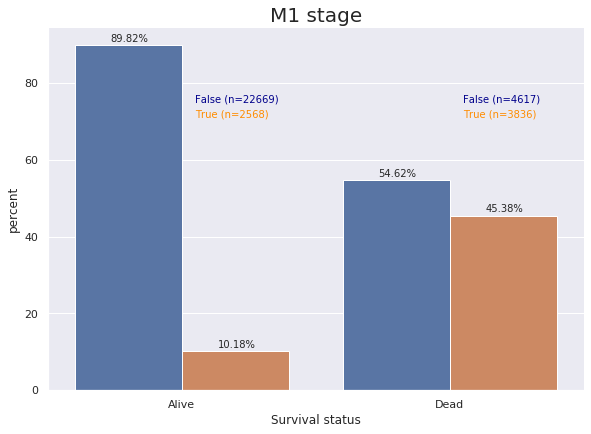

In [40]:
x, y = 'DEAD', 'M'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('M1 stage', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(9,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 75, 'False (n=22669)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 71, 'True (n=2568)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 75, 'False (n=4617)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 71, 'True (n=3836)', horizontalalignment='left', size='medium', color='darkorange');

In [41]:
df.groupby('DEAD')['STAGE'].value_counts()

DEAD  STAGE
0     3.0      9122
      2.0      8713
      1.0      4680
      4.0      2657
      0.0        65
1     4.0      3929
      3.0      3289
      2.0       926
      1.0       300
      0.0         9
Name: STAGE, dtype: int64

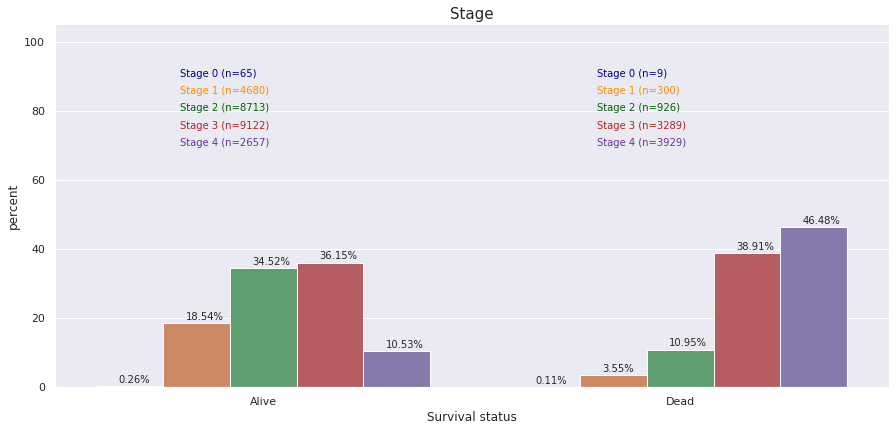

In [42]:
x, y = 'DEAD', 'STAGE'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('Stage', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(14,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(-0.2, 90, 'Stage 0 (n=65)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(-0.2, 85, 'Stage 1 (n=4680)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(-0.2, 80, 'Stage 2 (n=8713)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(-0.2, 75, 'Stage 3 (n=9122)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(-0.2, 70, 'Stage 4 (n=2657)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.8, 90, 'Stage 0 (n=9)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.8, 85, 'Stage 1 (n=300)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.8, 80, 'Stage 2 (n=926)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.8, 75, 'Stage 3 (n=3289)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.8, 70, 'Stage 4 (n=3929)', horizontalalignment='left', size='medium', color='rebeccapurple');

In [43]:
df.groupby('DEAD')['GRADE_2'].value_counts()

DEAD  GRADE_2
0     2.0        20069
      3.0         3292
      1.0         1840
      4.0           36
1     2.0         6830
      3.0         1421
      1.0          170
      4.0           32
Name: GRADE_2, dtype: int64

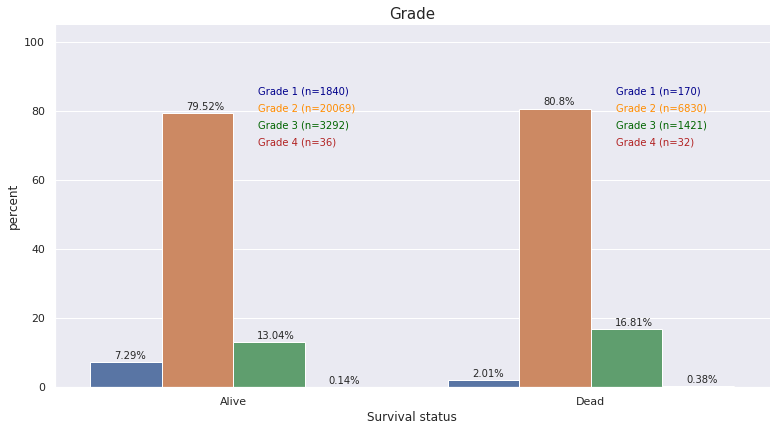

In [44]:
x, y = 'DEAD', 'GRADE_2'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('Grade', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(12,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.07, 85, 'Grade 1 (n=1840)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.07, 80, 'Grade 2 (n=20069)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.07, 75, 'Grade 3 (n=3292)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.07, 70, 'Grade 4 (n=36)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1.07, 85, 'Grade 1 (n=170)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.07, 80, 'Grade 2 (n=6830)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.07, 75, 'Grade 3 (n=1421)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1.07, 70, 'Grade 4 (n=32)', horizontalalignment='left', size='medium', color='firebrick');

In [45]:
df.groupby('DEAD')['AGE_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,70.113365,13.444866,3.0,63.0,72.0,80.0,104.0
1,8453.0,73.413167,13.020999,0.0,66.0,76.0,83.0,105.0


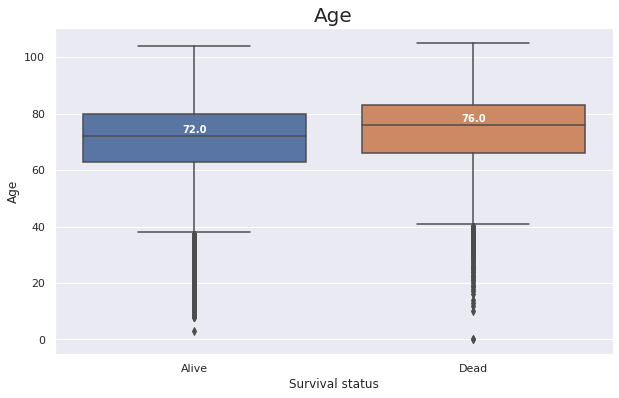

In [46]:
ax = sns.boxplot(data=df, x='DEAD', y='AGE_MEDIAN')

medians = df.groupby(['DEAD'])['AGE_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [47]:
df.groupby('DEAD')['L0801'].value_counts()

DEAD  L0801
0     0        20185
      1         5052
1     0         6813
      1         1640
Name: L0801, dtype: int64

In [48]:
df.groupby('DEAD')['L0201'].value_counts()

DEAD  L0201
0     0        21926
      1         3311
1     0         7300
      1         1153
Name: L0201, dtype: int64

In [49]:
df.groupby('DEAD')['L0301'].value_counts()

DEAD  L0301
0     0        22873
      1         2364
1     0         7618
      1          835
Name: L0301, dtype: int64

In [50]:
df.groupby('DEAD')['L1201'].value_counts()

DEAD  L1201
0     0        22498
      1         2739
1     0         7522
      1          931
Name: L1201, dtype: int64

In [51]:
df.groupby('DEAD')['L0401'].value_counts()

DEAD  L0401
0     0        22120
      1         3117
1     0         7502
      1          951
Name: L0401, dtype: int64

In [52]:
df.groupby('DEAD')['L1701'].value_counts()

DEAD  L1701
0     0        21957
      1         3280
1     0         7313
      1         1140
Name: L1701, dtype: int64

In [53]:
df.groupby('DEAD')['L1001'].value_counts()

DEAD  L1001
0     0        21323
      1         3914
1     0         7109
      1         1344
Name: L1001, dtype: int64

In [54]:
df.groupby('DEAD')['L0901'].value_counts()

DEAD  L0901
0     0        23771
      1         1466
1     0         7994
      1          459
Name: L0901, dtype: int64

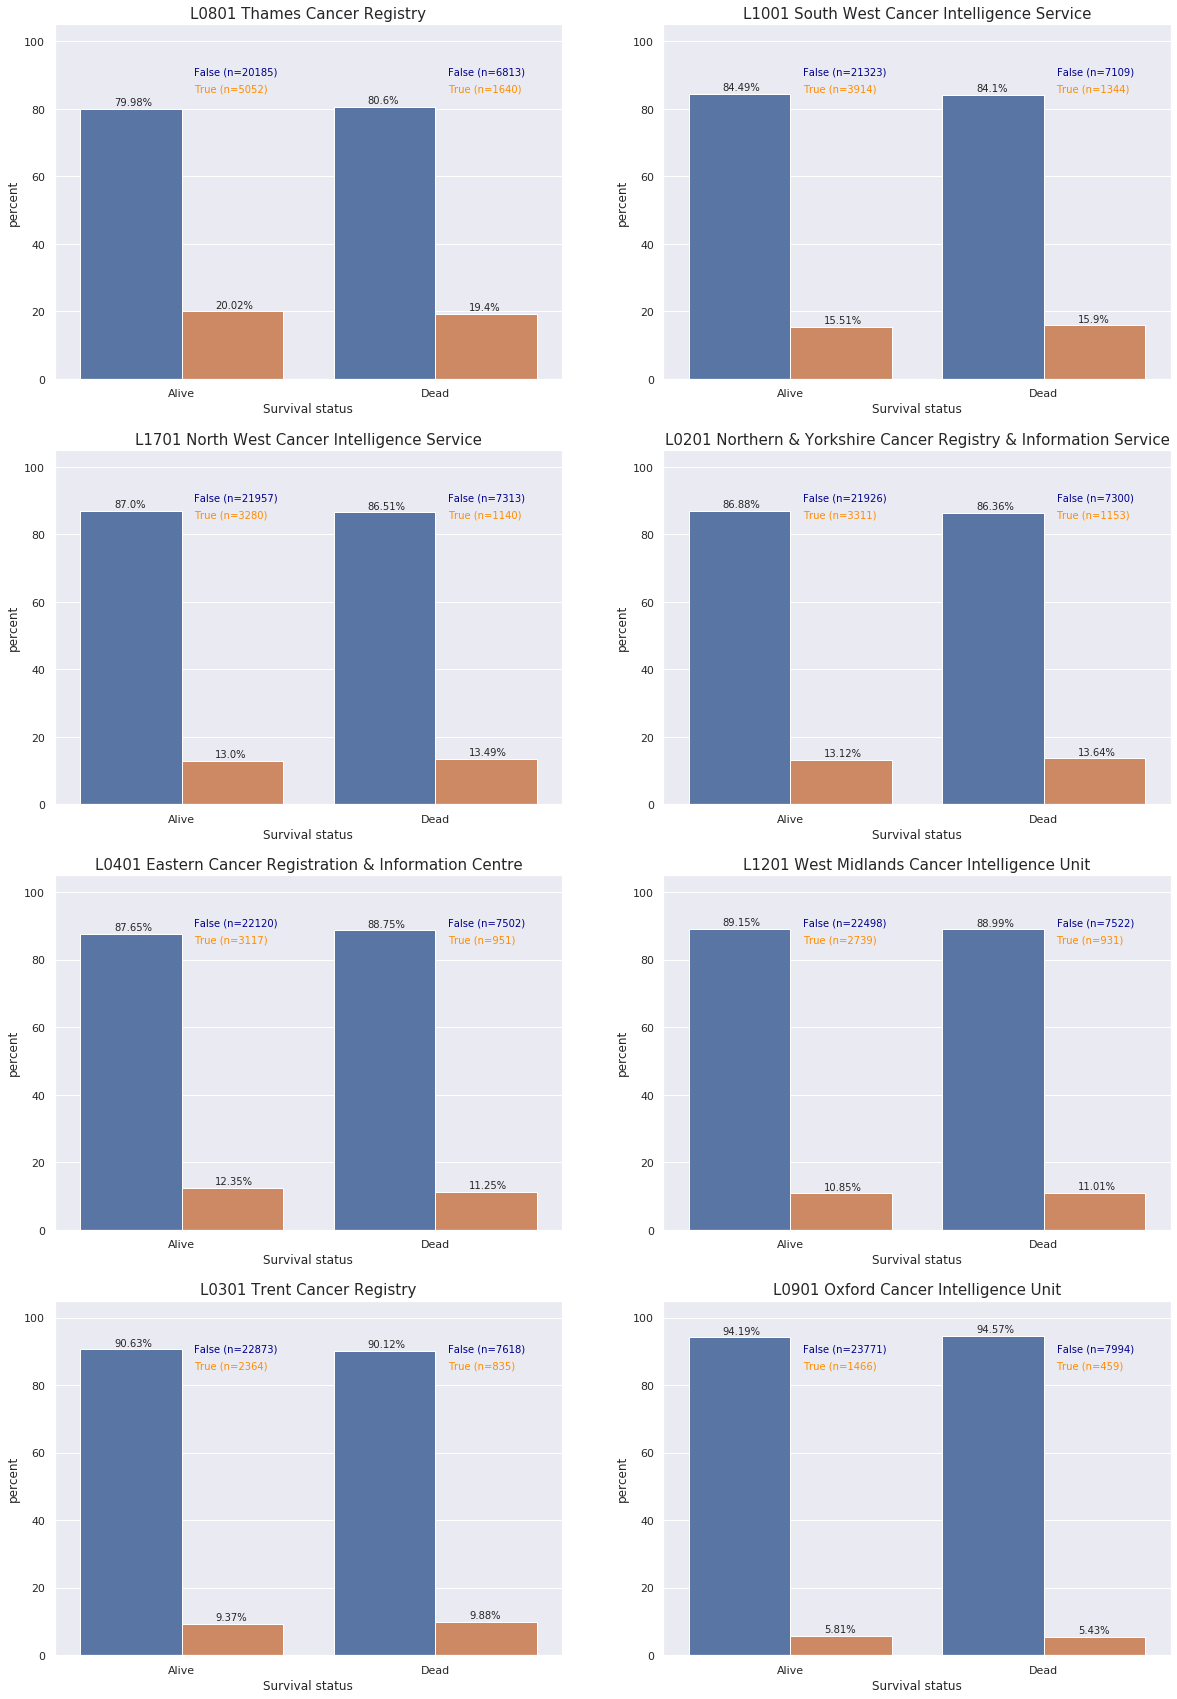

In [55]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))

#Figure 1
x, y = 'DEAD', 'L0801'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('L0801 Thames Cancer Registry', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 90, 'False (n=20185)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=5052)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=6813)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'True (n=1640)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'L1001'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('L1001 South West Cancer Intelligence Service', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 90, 'False (n=21323)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 85, 'True (n=3914)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 90, 'False (n=7109)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 85, 'True (n=1344)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'L1701'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x= x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('L1701 North West Cancer Intelligence Service', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 90, 'False (n=21957)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=3280)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=7313)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'True (n=1140)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'L0201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 1]))

axes[1,1].set_title('L0201 Northern & Yorkshire Cancer Registry & Information Service', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 90, 'False (n=21926)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 85, 'True (n=3311)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 90, 'False (n=7300)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 85, 'True (n=1153)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'L0401'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 0]))

axes[2,0].set_title('L0401 Eastern Cancer Registration & Information Centre', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 90, 'False (n=22120)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 85, 'True (n=3117)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 90, 'False (n=7502)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 85, 'True (n=951)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 6
x, y = 'DEAD', 'L1201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 1]))

axes[2,1].set_title('L1201 West Midlands Cancer Intelligence Unit', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 90, 'False (n=22498)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 85, 'True (n=2739)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 90, 'False (n=7522)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 85, 'True (n=931)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 7
x, y = 'DEAD', 'L0301'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 0]))

axes[3,0].set_title('L0301 Trent Cancer Registry', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 90, 'False (n=22873)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 85, 'True (n=2364)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 90, 'False (n=7618)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 85, 'True (n=835)', horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 8
x, y = 'DEAD', 'L0901'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 1]))

axes[3,1].set_title('L0901 Oxford Cancer Intelligence Unit', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 90, 'False (n=23771)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 85, 'True (n=1466)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 90, 'False (n=7994)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 85, 'True (n=459)', horizontalalignment='left', size='medium', color='darkorange')  
    
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [56]:
df.groupby('DEAD')['CURATIVE_TREAT'].value_counts()

DEAD  CURATIVE_TREAT
0     0                 18047
      1                  7190
1     0                  6037
      1                  2416
Name: CURATIVE_TREAT, dtype: int64

In [57]:
df.groupby('DEAD')['NON_CURATIVE_TREAT'].value_counts()

DEAD  NON_CURATIVE_TREAT
0     0                     23416
      1                      1821
1     0                      7867
      1                       586
Name: NON_CURATIVE_TREAT, dtype: int64

In [58]:
df.groupby('DEAD')['NO_ACTIVE_TREAT'].value_counts()

DEAD  NO_ACTIVE_TREAT
0     0                  24743
      1                    494
1     0                   8292
      1                    161
Name: NO_ACTIVE_TREAT, dtype: int64

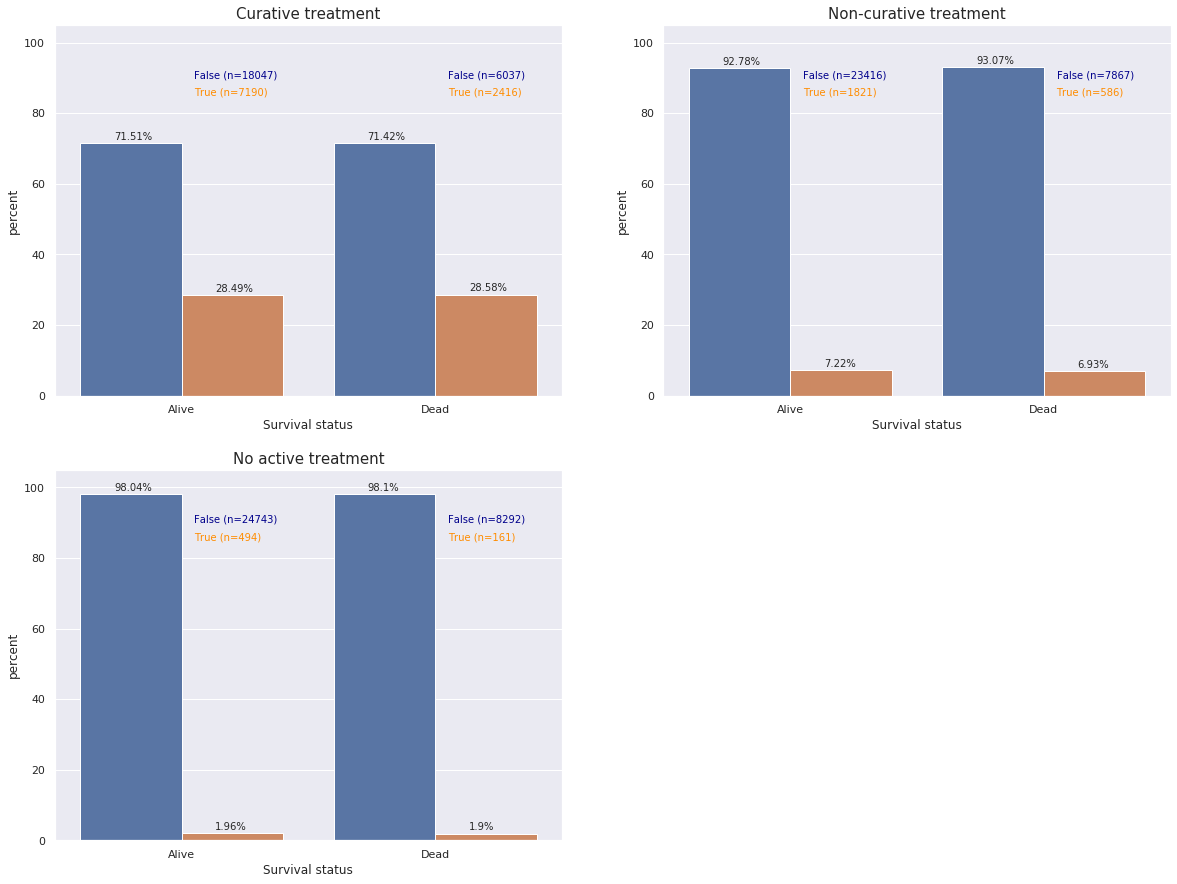

In [59]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))

#Figure 1
x, y = 'DEAD', 'CURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('Curative treatment', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 90, 'False (n=18047)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=7190)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=6037)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'True (n=2416)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'NON_CURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('Non-curative treatment', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 90, 'False (n=23416)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 85, 'True (n=1821)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 90, 'False (n=7867)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 85, 'True (n=586)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'NO_ACTIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('No active treatment', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 90, 'False (n=24743)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=494)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=8292)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'True (n=161)', horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
f.delaxes(ax = axes[1,1]) 
plt.show()

In [60]:
df.groupby('DEAD')['ECOG'].value_counts()

DEAD  ECOG
0     1.0     19983
      0.0      3468
      2.0      1008
      3.0       622
      4.0       156
1     1.0      6747
      0.0      1177
      2.0       308
      3.0       182
      4.0        39
Name: ECOG, dtype: int64

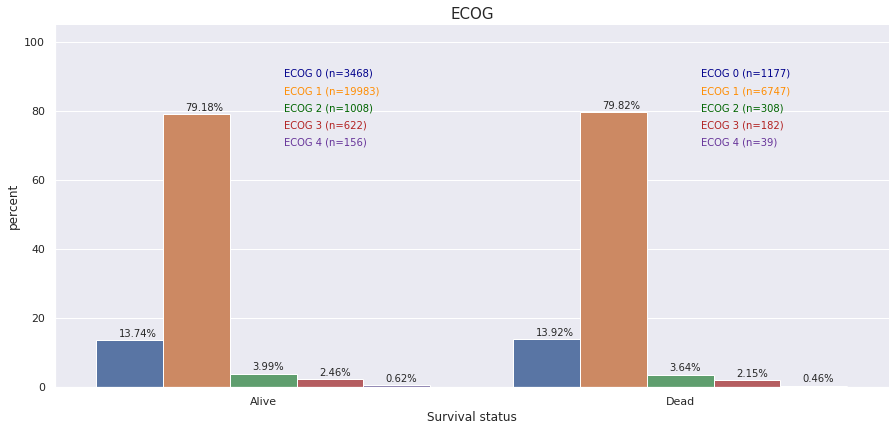

In [61]:
x, y = 'DEAD', 'ECOG'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('ECOG', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(14,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 90, 'ECOG 0 (n=3468)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 85, 'ECOG 1 (n=19983)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.05, 80, 'ECOG 2 (n=1008)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.05, 75, 'ECOG 3 (n=622)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.05, 70, 'ECOG 4 (n=156)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(1.05, 90, 'ECOG 0 (n=1177)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 85, 'ECOG 1 (n=6747)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, 'ECOG 2 (n=308)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1.05, 75, 'ECOG 3 (n=182)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1.05, 70, 'ECOG 4 (n=39)', horizontalalignment='left', size='medium', color='rebeccapurple');

In [62]:
df.groupby('DEAD')['DEPR'].value_counts()

DEAD  DEPR
0     2.0     5789
      1.0     5618
      3.0     5290
      4.0     4619
      5.0     3921
1     2.0     1906
      1.0     1856
      3.0     1711
      4.0     1591
      5.0     1389
Name: DEPR, dtype: int64

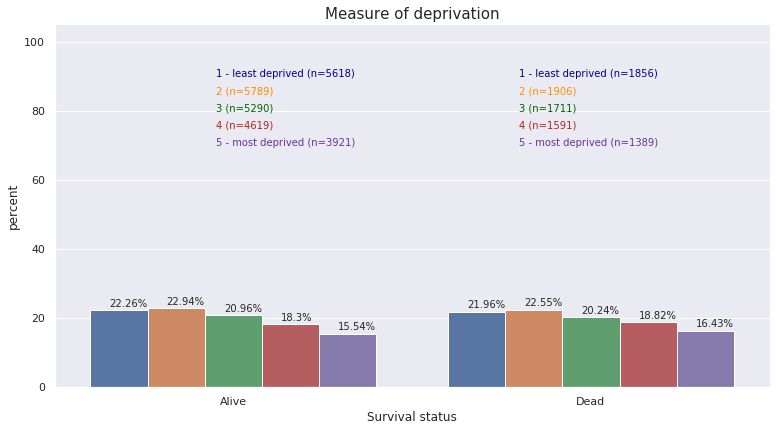

In [63]:
x, y = 'DEAD', 'DEPR'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('Measure of deprivation', fontsize=15)
ax.ax.set(xticklabels=['Alive','Dead'])
ax.ax.set(xlabel='Survival status')
ax.ax.set_ylim(0,105)
plt.gcf().set_size_inches(12,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(-0.05, 90, '1 - least deprived (n=5618)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(-0.05, 85, '2 (n=5789)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(-0.05, 80, '3 (n=5290)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(-0.05, 75, '4 (n=4619)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(-0.05, 70, '5 - most deprived (n=3921)', horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.80, 90, '1 - least deprived (n=1856)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.80, 85, '2 (n=1906)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.80, 80, '3 (n=1711)', horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.80, 75, '4 (n=1591)', horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.80, 70, '5 - most deprived (n=1389)', horizontalalignment='left', size='medium', color='rebeccapurple');

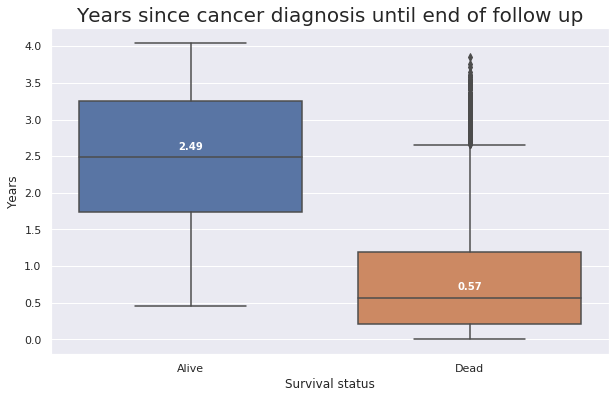

In [64]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'CANCER_YEARS_MEDIAN')

medians = df.groupby(['DEAD'])['CANCER_YEARS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Years', fontsize=12)
ax.set_title('Years since cancer diagnosis until end of follow up', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [65]:
df.groupby('DEAD')['DIAG_TO_SURG_DAYS_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,15.297203,37.228303,0.0,0.0,0.0,22.5,855.0
1,8453.0,7.453567,29.964864,0.0,0.0,0.0,0.0,482.0


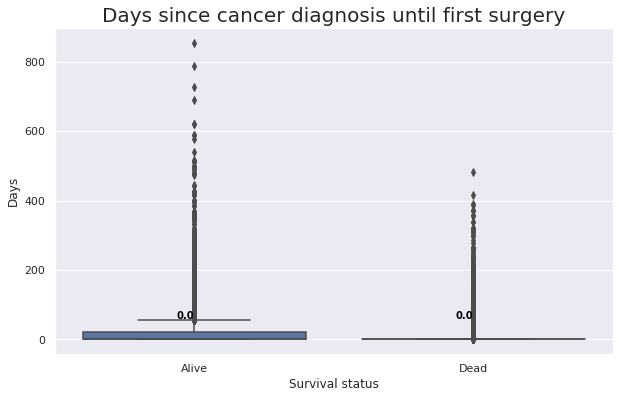

In [66]:
ax = sns.boxplot(data=df, x='DEAD', y='DIAG_TO_SURG_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_SURG_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 60, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until first surgery', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [67]:
df.groupby('DEAD')['DIAG_TO_TREAT_DAYS_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,181.510936,95.766629,0.0,175.0,175.0,175.0,1405.0
1,8453.0,172.515793,74.777702,0.0,175.0,175.0,175.0,1143.0


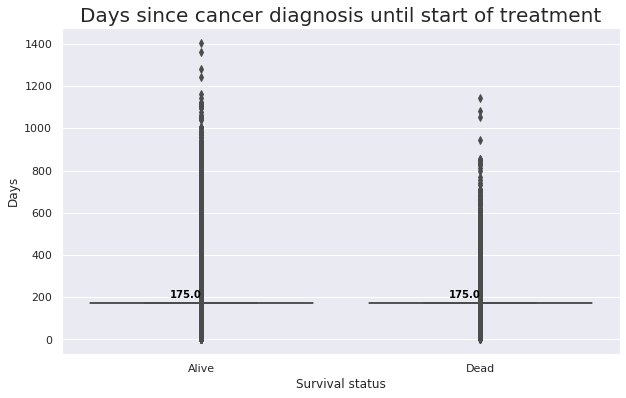

In [68]:
ax = sns.boxplot(data=df, x='DEAD', y='DIAG_TO_TREAT_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_TREAT_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 20, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until start of treatment', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [69]:
df['BMI'].describe()

count    33690.000000
mean        26.273445
std          2.342596
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

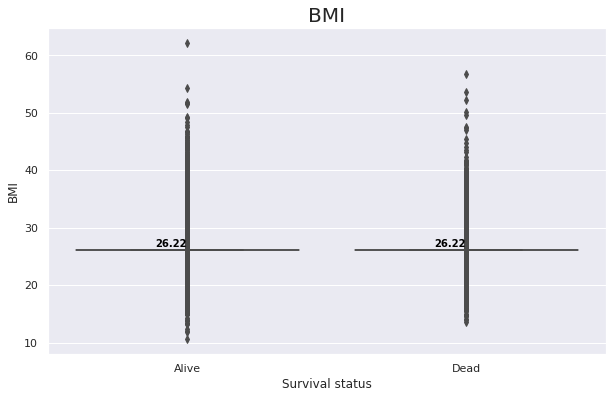

In [70]:
ax = sns.boxplot(data=df, x='DEAD', y='BMI')

medians = df.groupby(['DEAD'])['BMI'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_title('BMI', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [71]:
df.groupby('DEAD')['NEOADJUVANT'].value_counts()

DEAD  NEOADJUVANT
0     0              24617
      1                620
1     0               8256
      1                197
Name: NEOADJUVANT, dtype: int64

In [72]:
df.groupby('DEAD')['DIAGNOSTIC'].value_counts()

DEAD  DIAGNOSTIC
0     0             25037
      1               200
1     0              8391
      1                62
Name: DIAGNOSTIC, dtype: int64

In [73]:
df.groupby('DEAD')['PALLIATIVE'].value_counts()

DEAD  PALLIATIVE
0     0             22013
      1              3224
1     0              7188
      1              1265
Name: PALLIATIVE, dtype: int64

In [74]:
df.groupby('DEAD')['CURATIVE'].value_counts()

DEAD  CURATIVE
0     0           24793
      1             444
1     0            8351
      1             102
Name: CURATIVE, dtype: int64

In [75]:
df.groupby('DEAD')['ADJUVANT'].value_counts()

DEAD  ADJUVANT
0     0           22530
      1            2707
1     0            7337
      1            1116
Name: ADJUVANT, dtype: int64

In [76]:
df.groupby('DEAD')['DISEASE_MOD'].value_counts()

DEAD  DISEASE_MOD
0     0              25234
      1                  3
1     0               8452
      1                  1
Name: DISEASE_MOD, dtype: int64

In [77]:
df.groupby('DEAD')['STAGING'].value_counts()

DEAD  STAGING
0     0          25236
      1              1
1     0           8453
Name: STAGING, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


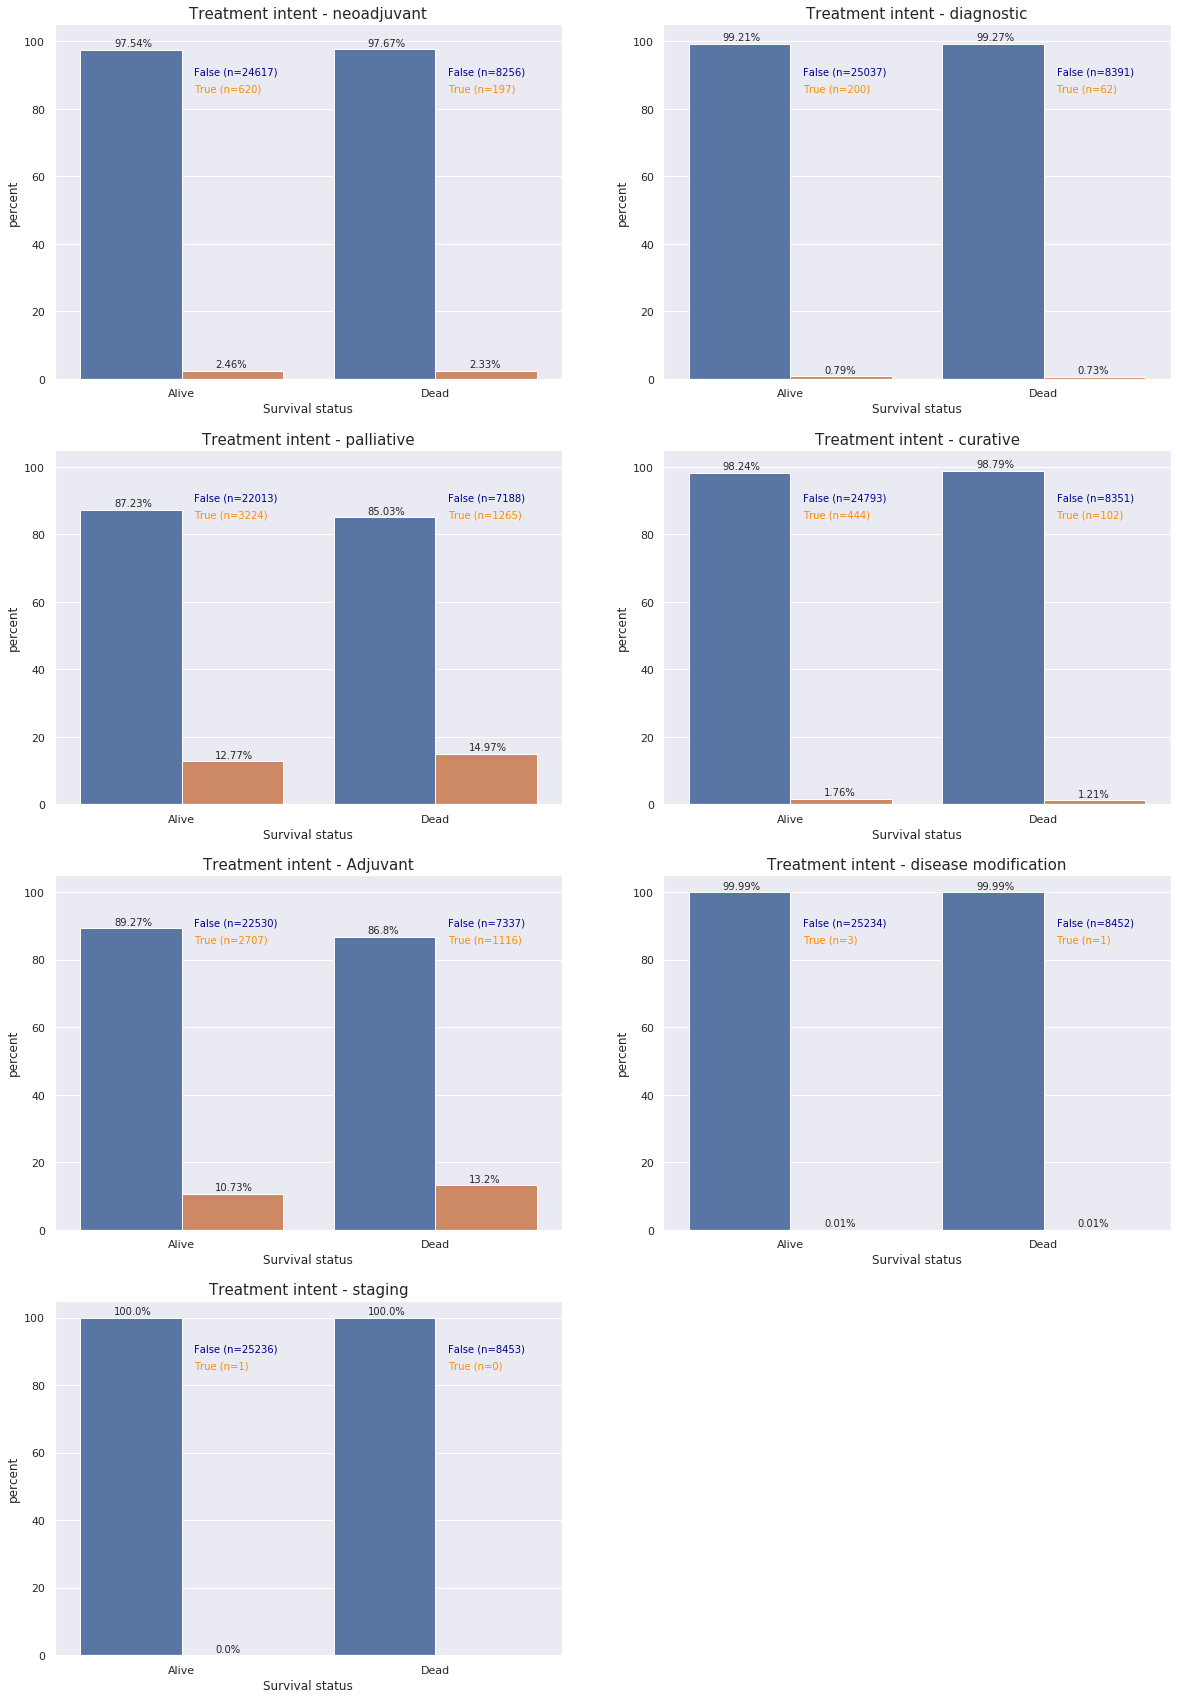

In [78]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))

#Figure 1
x, y = 'DEAD', 'NEOADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('Treatment intent - neoadjuvant', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 90, 'False (n=24617)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=620)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=8256)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'True (n=197)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'DIAGNOSTIC'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('Treatment intent - diagnostic', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 90, 'False (n=25037)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 85, 'True (n=200)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 90, 'False (n=8391)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 85, 'True (n=62)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'PALLIATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('Treatment intent - palliative', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 90, 'False (n=22013)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=3224)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=7188)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'True (n=1265)', horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 1]))

axes[1,1].set_title('Treatment intent - curative', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 90, 'False (n=24793)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 85, 'True (n=444)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 90, 'False (n=8351)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 85, 'True (n=102)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'ADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 0]))

axes[2,0].set_title('Treatment intent - Adjuvant', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 90, 'False (n=22530)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 85, 'True (n=2707)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 90, 'False (n=7337)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 85, 'True (n=1116)', horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'DISEASE_MOD'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 1]))

axes[2,1].set_title('Treatment intent - disease modification', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 90, 'False (n=25234)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 85, 'True (n=3)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 90, 'False (n=8452)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 85, 'True (n=1)', horizontalalignment='left', size='medium', color='darkorange')  


#Figure 7
x, y = 'DEAD', 'STAGING'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 0]))

axes[3,0].set_title('Treatment intent - staging', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)    
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 90, 'False (n=25236)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 85, 'True (n=1)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 90, 'False (n=8453)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 85, 'True (n=0)', horizontalalignment='left', size='medium', color='darkorange')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [79]:
df.groupby('DEAD')['CT_YES'].value_counts()

DEAD  CT_YES
0     0         24817
      1           420
1     0          8330
      1           123
Name: CT_YES, dtype: int64

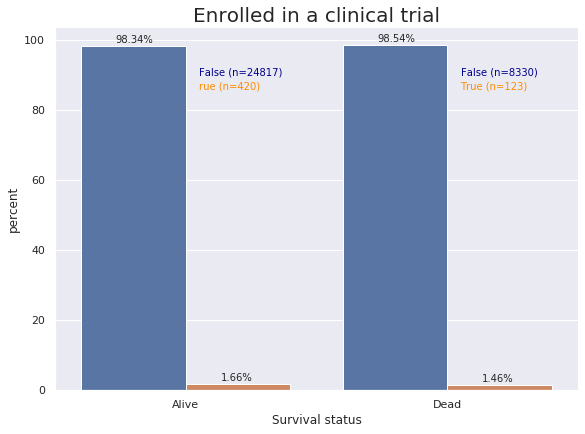

In [80]:
x, y = 'DEAD', 'CT_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('Enrolled in a clinical trial', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(9,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 90, 'False (n=24817)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 86, 'rue (n=420)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 90, 'False (n=8330)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 86, 'True (n=123)', horizontalalignment='left', size='medium', color='darkorange');

In [81]:
df.groupby('DEAD')['CHEM_RAD_YES'].value_counts()

DEAD  CHEM_RAD_YES
0     0               25063
      1                 174
1     0                8427
      1                  26
Name: CHEM_RAD_YES, dtype: int64

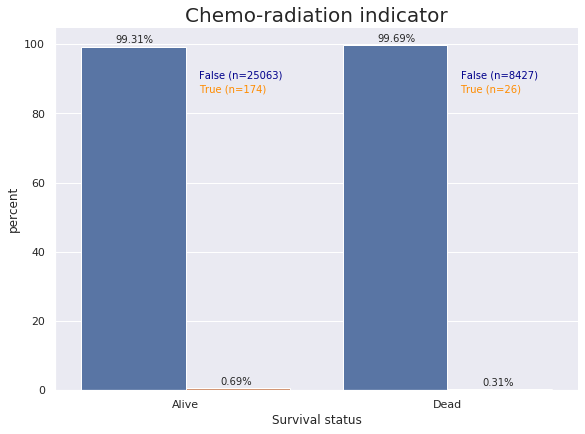

In [82]:
x, y = 'DEAD', 'CHEM_RAD_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', legend=False))

ax.ax.set_title('Chemo-radiation indicator', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(9,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 90, 'False (n=25063)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 86, 'True (n=174)', horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 90, 'False (n=8427)', horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 86, 'True (n=26)', horizontalalignment='left', size='medium', color='darkorange');

In [83]:
df.groupby('DEAD')['CHEMOTHERAPY2'].value_counts()

DEAD  CHEMOTHERAPY2
0     0                20319
      1                 4918
1     0                 6471
      1                 1982
Name: CHEMOTHERAPY2, dtype: int64

In [84]:
df.groupby('DEAD')['TARGETED2'].value_counts()

DEAD  TARGETED2
0     0            24546
      1              691
1     0             8224
      1              229
Name: TARGETED2, dtype: int64

In [85]:
df.groupby('DEAD')['CHEM_TARG2'].value_counts()

DEAD  CHEM_TARG2
0     0             24225
      1              1012
1     0              8130
      1               323
Name: CHEM_TARG2, dtype: int64

In [86]:
df.groupby('DEAD')['CHEM_RADIO2'].value_counts()

DEAD  CHEM_RADIO2
0     0              25063
      1                174
1     0               8419
      1                 34
Name: CHEM_RADIO2, dtype: int64

In [87]:
df.groupby('DEAD')['TARG_RADIO2'].value_counts()

DEAD  TARG_RADIO2
0     0              25235
      1                  2
1     0               8453
Name: TARG_RADIO2, dtype: int64

In [88]:
df.groupby('DEAD')['HORMONE2'].value_counts()

DEAD  HORMONE2
0     0           25114
      1             123
1     0            8438
      1              15
Name: HORMONE2, dtype: int64

In [89]:
df.groupby('DEAD')['OTHER2'].value_counts()

DEAD  OTHER2
0     0         25190
      1            47
1     0          8436
      1            17
Name: OTHER2, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


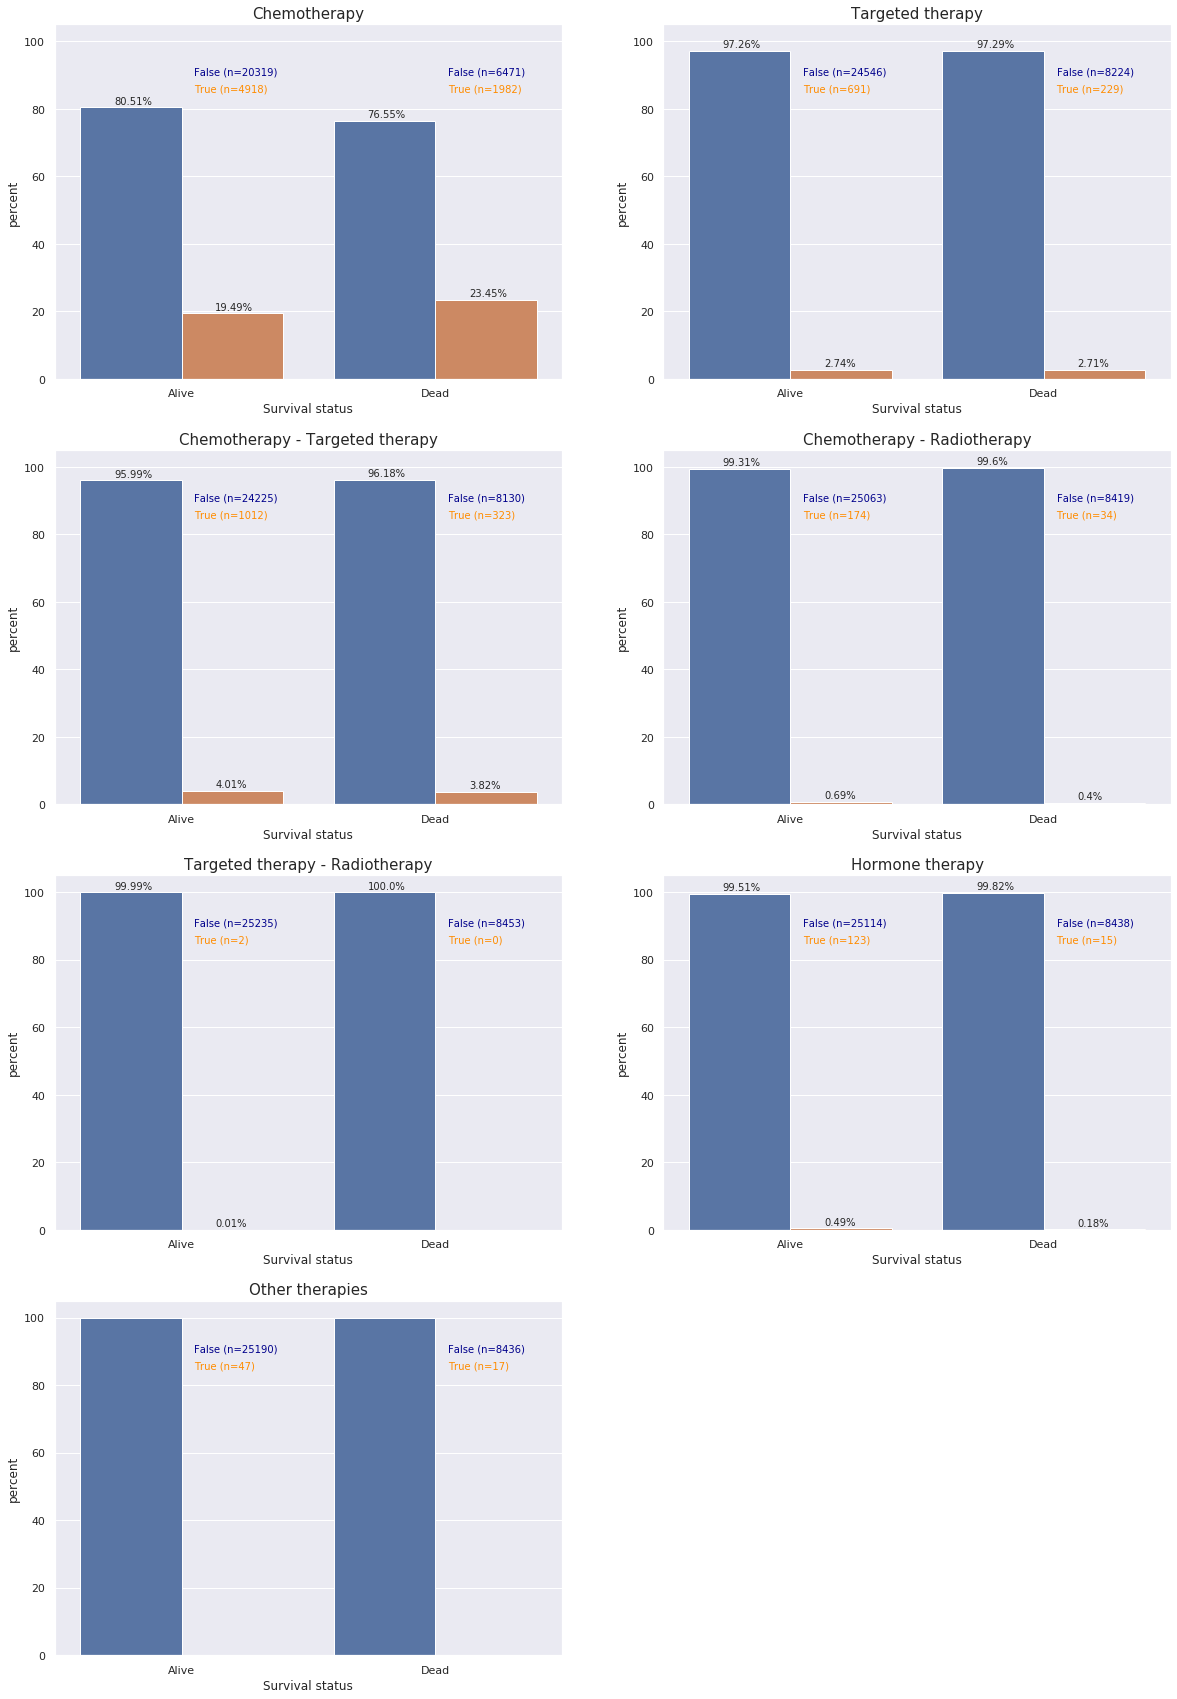

In [90]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))

#Figure 1
x, y = 'DEAD', 'CHEMOTHERAPY2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 0]))

axes[0,0].set_title('Chemotherapy', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 90, 'False (n=20319)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 85, 'True (n=4918)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 90, 'False (n=6471)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 85, 'True (n=1982)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'TARGETED2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[0, 1]))

axes[0,1].set_title('Targeted therapy', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 90, 'False (n=24546)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 85, 'True (n=691)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 90, 'False (n=8224)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 85, 'True (n=229)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'CHEM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 0]))

axes[1,0].set_title('Chemotherapy - Targeted therapy', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 90, 'False (n=24225)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 85, 'True (n=1012)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 90, 'False (n=8130)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 85, 'True (n=323)', horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CHEM_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[1, 1]))

axes[1,1].set_title('Chemotherapy - Radiotherapy', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 90, 'False (n=25063)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 85, 'True (n=174)', horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 90, 'False (n=8419)', horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 85, 'True (n=34)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'TARG_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 0]))

axes[2,0].set_title('Targeted therapy - Radiotherapy', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 90, 'False (n=25235)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 85, 'True (n=2)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 90, 'False (n=8453)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 85, 'True (n=0)', horizontalalignment='left', size='medium', color='darkorange')

    
#Figure 6
x, y = 'DEAD', 'HORMONE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[2, 1]))

axes[2,1].set_title('Hormone therapy', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)
    
axes[2,1].text(0.05, 90, 'False (n=25114)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 85, 'True (n=123)', horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 90, 'False (n=8438)', horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 85, 'True (n=15)', horizontalalignment='left', size='medium', color='darkorange')   


#Figure 9
x, y = 'DEAD', 'OTHER2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', ax=axes[3, 0]))

axes[3,0].set_title('Other therapies', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6) 
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 90, 'False (n=25190)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 85, 'True (n=47)', horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 90, 'False (n=8436)', horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 85, 'True (n=17)', horizontalalignment='left', size='medium', color='darkorange')
     
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [91]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'C180', 'C181',
       'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT', 'T', 'N', 'M', 'STAGE',
       'GRADE_2', 'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT', 'NON_CURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG', 'DEPR', 'CANCER_YEARS_MEDIAN',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD'],
      dtype='object')

Finally, I am going to save this data frame in a new pickle file and this will be the data frame that will be used for the final analysis.

In [92]:
df.to_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')